## ❤모듈정리

In [1]:
from PIL import Image
import glob
import os
from matplotlib import pyplot as plt
print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


## 🤎 사진 사이즈 조정

In [2]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
    
    
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper3/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper3/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper3/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

# 테스트 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper3/test/scissor"
resize_images(image_dir_path)

print("테스트 가위 이미지 resize 완료!")

# 테스트 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper3/test/rock"
resize_images(image_dir_path)

print("테스트 바위 이미지 resize 완료!")

# 테스트 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper3/test/paper"
resize_images(image_dir_path)

print("테스트 보 이미지 resize 완료!")

1006  images to be resized.
1006  images resized.
가위 이미지 resize 완료!
1006  images to be resized.
1006  images resized.
바위 이미지 resize 완료!
1006  images to be resized.
1006  images resized.
보 이미지 resize 완료!
120  images to be resized.
120  images resized.
테스트 가위 이미지 resize 완료!
120  images to be resized.
120  images resized.
테스트 바위 이미지 resize 완료!
120  images to be resized.
120  images resized.
테스트 보 이미지 resize 완료!


## 💜 학습,테스트 데이터 만들기

테스트 데이터로 시도하다가 점수가 잘 나오지 않아 내 데이터셋을 만들어서 학습을 하였는데 <h1>오버피팅</h1>이 발생하였고 이를 <h1>극복!</h1>하기 위해 3명의 데이터 셋을 합치고 다른 한사람의 데이터를 테스트로 사용하였다. 그러나 점수가 잘 나오지 않았고 그후에 <h1>최적화(Optimizer)</h1>를 'adam'에서 'rmsprop'으로 바꿔서 테스트를 하였더니 오버피팅도 없고 정확도도 잘나왔다!

In [3]:
import numpy as np

def load_data(img_path, number_of_data=3018):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper3"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))


# 테스트 데이터 만들기
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper3/test"
(x_test, y_test)=load_data(image_dir_path, number_of_data=360)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 3018 입니다.
x_train shape: (3018, 28, 28, 3)
y_train shape: (3018,)
학습데이터(x_train)의 이미지 개수는 360 입니다.
x_test shape: (360, 28, 28, 3)
y_test shape: (360,)


## 💙 이미지 및  데이터 형태 확인

라벨:  0


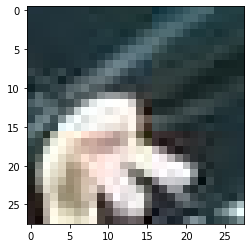

In [4]:
# 학습
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

라벨:  0


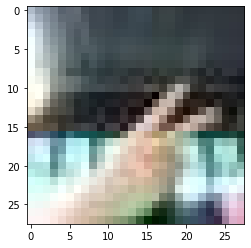

In [5]:
# 테스트
plt.imshow(x_test[0])
print('라벨: ', y_test[0])

In [6]:
print(x_train.shape,x_test.shape)

(3018, 28, 28, 3) (360, 28, 28, 3)


## 💚 모델 학습 

In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?

# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)

Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (No

## 🧡 검증

In [8]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
# 테스트
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

12/12 - 0s - loss: 1.8880 - accuracy: 0.7472
test_loss: 1.8879534006118774 
test_accuracy: 0.7472222447395325


## 🤎 회고 

    - 기본제공하는 데이터는 성능이 좋지 않아 내 손을 촬영해서 데이터를 만들고 다시 학습을 하였지만 이것은 오버피팅이 발생하였다. 그래서 4명의 데이터를 3명은 학습, 1명은 테스트로 사용하여 학습을 하였더니 여전히 성능이 구렸다. 여기서 이제 정규화를 adam에서 rmsprop로 바꿔보았고 이제서야 성능이 60%를 넘었다.
    
    - 데이터를 합치는 과정에서도 문제가 있었는데 처음에 파이썬을 이용해서 이름을 바꾸는 방식으로 데이터를 합쳤는데 다른 방식은 어떤방식이 있는지 알고싶어서 리눅스 명령어를 찾아보았고 rename을 이용하라고 해서 했지만 잘되지 않았다. 그래서 퍼실님이 윈도우에서 이름을 변경하는 방법을 알려주셨다.
